In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

# Labeled Sentiment Sentences Dataset

## Loading data

From http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

In [0]:
names = ['text','score']
amzn_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon_cells_labelled.txt',
                 sep="\t",names=names,na_values='?',header=None)
amzn_df = amzn_df.dropna()
amzn_df.head(2)

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [0]:
imdb_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imdb_labelled.txt',
                 sep="\t",names=names,na_values='?',header=None)
imdb_df = imdb_df.dropna()
imdb_df.head(2)

text  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0

In [0]:
yelp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/yelp_labelled.txt',
                 sep="\t",names=names,na_values='?',header=None)
yelp_df = yelp_df.dropna()
yelp_df.head(2)

text  score
0  Wow... Loved this place.      1
1        Crust is not good.      0

In [0]:
df = pd.concat([amzn_df,yelp_df,imdb_df])
df.head(2)

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

## Preprocessing and Cleaning

In [0]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def remove_stop(sent): 
  stop_words = set(stopwords.words('english'))
  stop_words.update(list(string.punctuation))

  word_tokens = word_tokenize(sent) 
    
  filtered_sent = [w for w in word_tokens if not w in stop_words] 
    
  return " ".join(filtered_sent)

In [0]:
df_clean = df
df_clean['text'] = df['text'].apply(remove_stop)
df_clean

text  score
0                 So way plug US unless I go converter      0
1                            Good case Excellent value      1
2                                        Great jawbone      1
3    Tied charger conversations lasting 45 minutes....      0
4                                        The mic great      1
..                                                 ...    ...
743    I got bored watching Jessice Lange take clothes      0
744  Unfortunately virtue film 's production work l...      0
745                               In word embarrassing      0
746                                  Exceptionally bad      0
747    All insult one 's intelligence huge waste money      0

[2748 rows x 2 columns]

## Word2Vec Model

Load pre-trained word2vec model (Google News model from https://github.com/3Top/word2vec-api)

---



In [0]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.bin', binary=True)  

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model.most_similar('amazing')[:5]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('incredible', 0.9054000973701477),
 ('awesome', 0.8282865285873413),
 ('unbelievable', 0.8201264142990112),
 ('fantastic', 0.778986930847168),
 ('phenomenal', 0.7642048001289368)]

In [0]:
model.similarity('bad', 'terrible')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.68286115

In [0]:
model.similarity('good', 'terrible')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5602042

In [0]:
df_clean['text'][1]

1                            Good case Excellent value
1                                           Crust good
1    Not sure lost flat characters audience nearly ...
Name: text, dtype: object

In [0]:
def get_avg_vec(words):
  # remove out-of-vocabulary words
  words = [word for word in words if word in model.vocab]
  if len(words) >= 1:
      return np.mean(model[words], axis=0)
  else:
      return []

In [0]:
df_clean['vector'] = df_clean['text'].apply(get_avg_vec)
df_clean

text  ...                                             vector
0                 So way plug US unless I go converter  ...  [-0.15403965, 0.09595925, 0.029959543, 0.11782...
1                            Good case Excellent value  ...  [-0.11632995, 0.1293335, 0.020962525, 0.075708...
2                                        Great jawbone  ...  [-0.18381958, 0.10445557, -0.03401489, 0.16113...
3    Tied charger conversations lasting 45 minutes....  ...  [-0.16171876, 0.09783691, 0.023985596, 0.11625...
4                                        The mic great  ...  [-0.22822265, 0.13035278, -0.01776123, 0.13750...
..                                                 ...  ...                                                ...
743    I got bored watching Jessice Lange take clothes  ...  [-0.18874049, 0.10319973, -0.0039986274, 0.152...
744  Unfortunately virtue film 's production work l...  ...  [-0.19134094, 0.11729137, -0.014226546, 0.1355...
745                               In word embarrassing  ...  [-0.18509674, 0.1005497, 0.00566864, 0.1585083...
746                                  Exceptionally bad  ...  [-0.12887573, 0.116830006, -0.0014953613, 0.11...
747    All insult one 's intelligence huge waste money  ...  [-0.15714785, 0.11121248, -0.016771818, 0.1155...

[2748 rows x 3 columns]

## Classification

Logistic Regression

In [0]:
X = np.array(df_clean['vector'].tolist())
y = np.array(df_clean['score'])

logreg = linear_model.LogisticRegression(penalty='none',solver='lbfgs')
logreg.fit(X, y)
yhat = logreg.predict(X)

acc = np.mean(yhat == y)
print("Accuracy: " + str(acc))

recall = np.sum((yhat == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhat == 1)*(y == 1))/np.sum(yhat == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy: 0.6430131004366813
Recall: 0.6471861471861472
Precision: 0.6457883369330454


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVM 


Using 70/30 train-test split for data.

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_clean, test_size=0.3)

train

text  ...                                             vector
922                                   Happy far  ...  [-0.1714681, 0.11073812, 0.020487467, 0.184834...
813             The Jabra EarGels fit ears well  ...  [-0.17491011, 0.15767045, -0.005601363, 0.0993...
299             The food excellent service good  ...  [-0.14970568, 0.1273442, 0.02029984, 0.1113925...
330        Whatever prompted documentary beyond  ...  [-0.15390703, 0.12977256, -0.012285787, 0.1518...
97                         Food arrived quickly  ...  [-0.11656278, 0.08544204, 0.09532255, 0.135598...
..                                          ...  ...                                                ...
298  This movie good humorous comment life 2006  ...  [-0.14642164, 0.09433492, 0.031317815, 0.10073...
24                                 So performed  ...  [-0.14667302, 0.14572977, 0.015536222, 0.14892...
180                          Do n't buy product  ...  [-0.19052124, 0.10671561, 0.012669154, 0.13439...
125         Host staff lack better word BITCHES  ...  [-0.187003, 0.109936304, -0.004457746, 0.11347...
774     The flair bartenders absolutely amazing  ...  [-0.18041179, 0.12348836, 0.0067993165, 0.1214...

[1923 rows x 3 columns]

In [0]:
Xtr1 = np.array(train['vector'].tolist())
ytr1 = np.array(train['score'])

Xts1 = np.array(test['vector'].tolist())
yts1 = np.array(test['score'])

In [0]:
from sklearn import svm 

svcrbf = svm.SVC(probability=False, kernel="rbf",verbose=10) #C=2.8, gamma=.0073

In [0]:
Xtr1

array([[-1.71468094e-01,  1.10738121e-01,  2.04874668e-02, ...,
        -2.67333984e-02, -7.66194686e-02,  2.19970703e-01],
       [-1.74910113e-01,  1.57670453e-01, -5.60136279e-03, ...,
         8.37846252e-04, -1.09333389e-01,  1.78280920e-01],
       [-1.49705678e-01,  1.27344206e-01,  2.02998407e-02, ...,
         1.35633675e-03, -1.36115178e-01,  1.65651679e-01],
       ...,
       [-1.90521240e-01,  1.06715612e-01,  1.26691544e-02, ...,
        -7.04432875e-02, -5.89163639e-02,  1.53573170e-01],
       [-1.87003002e-01,  1.09936304e-01, -4.45774617e-03, ...,
        -6.53948109e-06, -7.69053847e-02,  1.80350170e-01],
       [-1.80411786e-01,  1.23488359e-01,  6.79931650e-03, ...,
        -2.70914715e-02, -1.26572669e-01,  1.66263834e-01]], dtype=float32)

In [0]:
svcrbf.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [0]:
yhat_ts = svcrbf.predict(Xts1)

In [0]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.589091


# Amazon Review Dataset

Arts, Crafts, and Sewing 5-core dataset with 494,485 reviews. From https://nijianmo.github.io/amazon/index.html

In [0]:
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df1 = getDF('/content/drive/My Drive/Colab Notebooks/Arts_Crafts_and_Sewing_5.json.gz')
df1.head(2)

overall  verified   reviewTime  ... unixReviewTime vote image
0      4.0      True  03 29, 2016  ...     1459209600  NaN   NaN
1      5.0      True  08 12, 2015  ...     1439337600   18   NaN

[2 rows x 12 columns]

In [0]:
df2 = df1[['overall','reviewText']]
df2

overall                                         reviewText
0           4.0                Contains some interesting stitches.
1           5.0  I'm a fairly experienced knitter of the one-co...
2           4.0  Great book but the index is terrible. Had to w...
3           5.0  I purchased the Kindle edition which is incred...
4           5.0  Very well laid out and very easy to read.\n\nT...
...         ...                                                ...
494480      4.0  What's not to love? The price. Watercolor pens...
494481      5.0                     lots of color in these markers
494482      5.0  These are really fun to use. I love watercolor...
494483      1.0  While the box says vibrant colors, only a few ...
494484      3.0  Core is very hard and does not transfer color ...

[494485 rows x 2 columns]

Text(0.5, 0, 'Score')

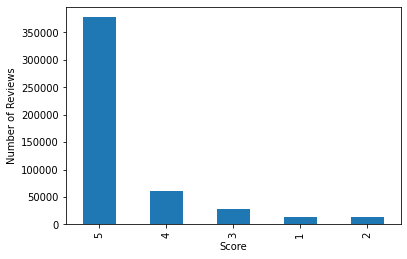

In [0]:
df2['overall'].value_counts().plot(kind='bar')
plt.ylabel('Number of Reviews')
plt.xlabel('Score')

In [0]:
def get_avg_vec_str(words):
  words = words.split(" ")
  # remove out-of-vocabulary words
  words = [word for word in words if word in model.vocab]
  if len(words) >= 1:
      return np.mean(model[words], axis=0)
  else:
      return []

In [0]:
def remove_stop_str(sent): 
  stop_words = set(stopwords.words('english'))

  word_tokens = word_tokenize(sent) 
    
  filtered_sent = [w for w in word_tokens if not w in stop_words and w not in string.punctuation] 
    
  return " ".join(filtered_sent)

In [0]:
df2_clean = df2

df2_clean['reviewText'] = df2_clean['reviewText'].astype(str)
df2_clean['reviewText'] = df2_clean['reviewText'].apply(remove_stop_str)

df2_clean['vector'] = df2_clean['reviewText'].apply(get_avg_vec_str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [0]:
df2_clean['overall'] = df2_clean['overall'].astype(int)
df2_clean = df2_clean[df2_clean['vector'].map(len) == 300]

df2_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


overall  ...                                             vector
0             4  ...  [-0.044108074, -0.22005208, -0.13354492, -0.14...
1             5  ...  [0.03413918, 0.023813054, -0.011743799, 0.1100...
2             4  ...  [0.025712447, -0.034163043, 0.027576793, 0.059...
3             5  ...  [0.07250404, 0.01050806, -0.16109848, 0.108413...
4             5  ...  [0.013292815, 0.037706878, -0.031193784, 0.131...
...         ...  ...                                                ...
494480        4  ...  [0.059387207, 0.071624756, -0.07342529, 0.0408...
494481        5  ...  [0.08336385, 0.044504803, 0.060058594, 0.18261...
494482        5  ...  [0.04064109, 0.047958374, 0.0097822705, 0.0790...
494483        1  ...  [0.029306265, 0.09275994, -0.0007465069, 0.095...
494484        3  ...  [0.066654205, 0.097332, -0.020462036, 0.136619...

[492745 rows x 3 columns]

In [0]:
def mark_sentiment(rating):
  if(rating < 3):
    return 0
  return 1

In [0]:
df2_clean = df2_clean[df2_clean.overall != 3]
df2_clean['overall']=df2_clean['overall'].apply(mark_sentiment)

df2_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


overall  ...                                             vector
0             1  ...  [-0.044108074, -0.22005208, -0.13354492, -0.14...
1             1  ...  [0.03413918, 0.023813054, -0.011743799, 0.1100...
2             1  ...  [0.025712447, -0.034163043, 0.027576793, 0.059...
3             1  ...  [0.07250404, 0.01050806, -0.16109848, 0.108413...
4             1  ...  [0.013292815, 0.037706878, -0.031193784, 0.131...
...         ...  ...                                                ...
494479        1  ...  [0.019576505, 0.07284982, -0.046767462, 0.0546...
494480        1  ...  [0.059387207, 0.071624756, -0.07342529, 0.0408...
494481        1  ...  [0.08336385, 0.044504803, 0.060058594, 0.18261...
494482        1  ...  [0.04064109, 0.047958374, 0.0097822705, 0.0790...
494483        0  ...  [0.029306265, 0.09275994, -0.0007465069, 0.095...

[464163 rows x 3 columns]

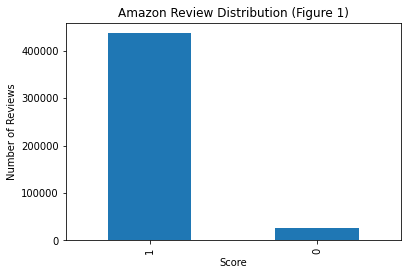

In [0]:
df2_clean['overall'].value_counts().plot(kind='bar')
plt.ylabel('Number of Reviews')
plt.xlabel('Score')
plt.title("Amazon Review Distribution (Figure 1)")
plt.show()

In [0]:
df3 = df2_clean.sample(200000)

## SVM

In [0]:
from sklearn.model_selection import train_test_split

train2, test2 = train_test_split(df3, test_size=0.3)

In [0]:
Xtr2 = np.array(train2['vector'].tolist())
ytr2 = np.array(train2['overall'])

Xts2 = np.array(test2['vector'].tolist())
yts2 = np.array(test2['overall'])

In [0]:
from sklearn import svm 

svcrbf = svm.SVC(probability=False, kernel="rbf",verbose=10) #C=2.8, gamma=.0073

In [0]:
svcrbf.fit(Xtr2,ytr2)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [0]:
yhat_ts2 = svcrbf.predict(Xts2)

In [0]:
acc = np.mean(yhat_ts2 == yts2)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.954883


In [0]:
recall = np.sum((yhat_ts2 == 1)*(yts2 == 1))/np.sum(yts2 == 1)
precision = np.sum((yhat_ts2 == 1)*(yts2 == 1))/np.sum(yhat_ts2 == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Recall: 0.997083465903065
Precision: 0.9568794422486472


In [0]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/test_outputs.pkl', 'wb') as f:
  pickle.dump(yhat_ts2, f)

## Logistic Regression

In [0]:
X = np.array(df3['vector'].tolist())
y = np.array(df3['overall'])

logreg = linear_model.LogisticRegression(penalty='none',solver='lbfgs')
logreg.fit(X, y)
yhat = logreg.predict(X)

acc = np.mean(yhat == y)
print("Accuracy: " + str(acc))

recall = np.sum((yhat == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhat == 1)*(y == 1))/np.sum(yhat == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.95107
Recall: 0.9921760884691585
Precision: 0.9573930469634923


In [0]:
df3.shape

NameError: ignored

## Baseline of all one's

In [0]:
 df3

overall  ...                                             vector
356048        1  ...  [-0.0023905437, 0.077617645, -0.02590084, 0.06...
113023        1  ...  [-0.07324219, 0.15649414, -0.09667969, 0.27587...
193006        1  ...  [-0.008178711, -0.11779785, 0.03951009, 0.0665...
288337        1  ...  [0.05288425, 0.06585151, 0.0097290035, 0.11316...
458416        1  ...  [0.07573954, 0.061747234, 0.049729243, 0.08110...
...         ...  ...                                                ...
329646        1  ...  [-0.019256592, 0.09391403, 0.02437973, 0.00437...
282694        1  ...  [0.05280413, 0.10735866, 0.027692523, 0.202924...
449022        1  ...  [-0.00048828125, 0.11791992, 0.10913086, 0.146...
185375        0  ...  [0.027850341, 0.07504883, -0.07689209, 0.08489...
477698        1  ...  [-0.11987305, 0.009277344, -0.074930824, 0.068...

[200000 rows x 3 columns]

In [0]:
type(df3['overall'])

pandas.core.series.Series

In [0]:
all_one = np.full((60000), 1)
all_one

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
acc = np.mean(all_one == yts2)
print('Accuaracy = {0:f}'.format(acc))

recall = np.sum((all_one == 1)*(yts2 == 1))/np.sum(yts2 == 1)
precision = np.sum((all_one == 1)*(yts2 == 1))/np.sum(all_one == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuaracy = 0.942900
Recall: 1.0
Precision: 0.9429


## Google Universal Sentence Encoder

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607502 ... -0.03242778 -0.04575741
   0.05370456]
 [ 0.05080861 -0.01652428  0.01573781 ...  0.00976659  0.03170123
   0.01788119]], shape=(2, 512), dtype=float32)


In [0]:
df2

overall                                         reviewText
0           4.0                Contains some interesting stitches.
1           5.0  I'm a fairly experienced knitter of the one-co...
2           4.0  Great book but the index is terrible. Had to w...
3           5.0  I purchased the Kindle edition which is incred...
4           5.0  Very well laid out and very easy to read.\n\nT...
...         ...                                                ...
494480      4.0  What's not to love? The price. Watercolor pens...
494481      5.0                     lots of color in these markers
494482      5.0  These are really fun to use. I love watercolor...
494483      1.0  While the box says vibrant colors, only a few ...
494484      3.0  Core is very hard and does not transfer color ...

[494485 rows x 2 columns]

In [0]:
df4 = df2
df4['overall'] = df4['overall'].astype(int)
df4 = df4[df4.overall != 3]
df4['overall']=df4['overall'].apply(mark_sentiment)
df4['reviewText']=df4['reviewText'].astype(str)
df5 = df4.sample(100000)
df5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

overall                                         reviewText
192379        1             Any one who likes to sew needs extras.
438327        1  Strong thread for diameter.  Very slow deliver...
70052         1                     As described~ Arrived on time~
297582        1  I love those colors of the snaps.  Great product.
349486        1                 Looks like it will be fun to make.
...         ...                                                ...
332769        1                                       as described
19239         1  These are a nice set of watercolor pencils.  I...
73506         1                                       Nice product
429845        1  There is absolutely no other brand to use for ...
186671        1  I've been using these needles for years and wa...

[100000 rows x 2 columns]

In [0]:
from sklearn.model_selection import train_test_split

train5, test5 = train_test_split(df5, test_size=0.3)

In [0]:
Xtr5 = np.array(embed(train5['reviewText']))
ytr5 = np.array(train5['overall'])

Xts5 = np.array(embed(test5['reviewText']))
yts5 = np.array(test5['overall'])

In [0]:
from sklearn import svm 

svcrbf = svm.SVC(probability=False, kernel="rbf",verbose=10)

In [0]:
svcrbf.fit(Xtr5,ytr5)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [0]:
yhat_ts5 = svcrbf.predict(Xts5)

In [0]:
acc = np.mean(yhat_ts5 == yts5)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.966567


In [0]:
recall = np.sum((yhat_ts5 == 1)*(yts5 == 1))/np.sum(yts5 == 1)
precision = np.sum((yhat_ts5 == 1)*(yts5 == 1))/np.sum(yhat_ts5 == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Recall: 0.9928485449267153
Precision: 0.9722308892355694


# CODE FROM OTHER NOTEBOOK

#**Sentence Sentiment Classification**

1.   Loading data
2.   Word embedding and mapping:
*   Google's word2vec
*   Facebook's FastText
*   Bag of words
3.   Trainning the model:
*   Logistic regression
*   K-nearest neighbor algorithm
*   support vector machines
4.   Measure performance:
*   Train-test split
*   loss, error rate, recall, percision

Questions after testing:
should we add regularization? feature transformation ..?







# Loading Data (UCI)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [0]:
imdb_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

yelp_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/yelp_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

amazon_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/amazon_cells_labelled.txt",delimiter='\t',
                        header=None, 
                        names=['review', 'sentiment'])



In [0]:
imdb_df.head()

review  sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [0]:
yelp_df.head()

review  sentiment
0                           Wow... Loved this place.          1
1                                 Crust is not good.          0
2          Not tasty and the texture was just nasty.          0
3  Stopped by during the late May bank holiday of...          1
4  The selection on the menu was great and so wer...          1

In [0]:
amazon_df.head()

review  sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

In [0]:
allData = pd.concat([amazon_df,yelp_df,imdb_df])

In [0]:
allData

review  sentiment
0    So there is no way for me to plug it in here i...          0
1                          Good case, Excellent value.          1
2                               Great for the jawbone.          1
3    Tied to charger for conversations lasting more...          0
4                                    The mic is great.          1
..                                                 ...        ...
743  I just got bored watching Jessice Lange take h...          0
744  Unfortunately, any virtue in this film's produ...          0
745                   In a word, it is embarrassing.            0
746                               Exceptionally bad!            0
747  All in all its an insult to one's intelligence...          0

[2748 rows x 2 columns]

In [0]:
sentences=allData['review'].tolist()
label=allData['sentiment'].tolist()

In [0]:
# examples:
for i in range(7):
    print("{} {}".format(sentences[i],label[i]))

So there is no way for me to plug it in here in the US unless I go by a converter. 0
Good case, Excellent value. 1
Great for the jawbone. 1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! 0
The mic is great. 1
I have to jiggle the plug to get it to line up right to get decent volume. 0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. 0


In [0]:
allData.shape

(2748, 2)

# word2vec

Using Gensim library

In [0]:
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
import re  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [0]:
# make sure the data is clean
allData.isnull().sum()

review       0
sentiment    0
dtype: int64

##bigrams (small data)

> Indented block



In [0]:
from gensim.models.phrases import Phrases, Phraser

INFO - 05:54:11: 'pattern' package not found; tag filters are not available for English


In [0]:
sent = [row.split() for row in allData['review']]

In [0]:
phrases = Phrases(sent, min_count=30, progress_per=1000)

INFO - 05:54:11: collecting all words and their counts
INFO - 05:54:11: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 05:54:11: PROGRESS: at sentence #1000, processed 10246 words and 9671 word types
INFO - 05:54:11: PROGRESS: at sentence #2000, processed 21140 words and 18504 word types
INFO - 05:54:11: collected 30876 word types from a corpus of 35742 words (unigram + bigrams) and 2748 sentences
INFO - 05:54:11: using 30876 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [0]:
bigram = Phraser(phrases)
sentences = bigram[sent]

INFO - 05:54:11: source_vocab length 30876
INFO - 05:54:12: Phraser built with 0 phrasegrams


In [0]:
sentences

In [0]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

8012

##Train (small data)

In [0]:
import multiprocessing

from gensim.models import Word2Vec

In [0]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [0]:
# 1-setup
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [0]:
# 2-building vocabulary
#w2v_model.build_vocab(sentences, progress_per=1000)

In [0]:
# 3-trainning the model
#w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [0]:
# memory effeciency
#w2v_model.init_sims(replace=True)

In [0]:
#w2v_model.wv.most_similar(positive=["amazing"])

In [0]:
#w2v_model.wv.most_similar(positive=["bad"])

#Adding bigger data from Amazon

In [0]:
# try adding new data
names = ['ID', 'productID','userID', 'Profilename', 
         'helpfulnessnum', 'helpfulnessden', 'score', 'time', 'summary','text']
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv',
                 header=None,names=names,na_values='?')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# remove first raw
df2 = df1[1:]

In [0]:
df3 = df2[df2['score']!=3]  

In [0]:
df=df3[['text','score']]


In [0]:
print(df.shape)
df.head()

(531051, 2)


text score
1  I have bought several of the Vitality canned d...     5
2  Product arrived labeled as Jumbo Salted Peanut...     1
3  This is a confection that has been around a fe...     4
4  If you are looking for the secret ingredient i...     2
5  Great taffy at a great price.  There was a wid...     5

In [0]:
# make sure the data is clean (no null)
print(df['score'].isnull().sum())
df['text'].isnull().sum() 

0


0

In [0]:
def mark_sentiment(rating):
  if(int(rating)<3):
    return 0
  else:
    return 1

In [0]:
df['sentiment']=df['score'].apply(mark_sentiment)
df.drop(['score'],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df['review']=df['text']
df.drop(['text'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df.head()

sentiment                                             review
1          1  I have bought several of the Vitality canned d...
2          0  Product arrived labeled as Jumbo Salted Peanut...
3          1  This is a confection that has been around a fe...
4          0  If you are looking for the secret ingredient i...
5          1  Great taffy at a great price.  There was a wid...

In [0]:
df.shape

(531051, 2)

In [0]:
data = pd.concat([allData, df])

In [0]:
data.shape

(533799, 2)

In [0]:
data.head()

review  sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

In [0]:
data1 = data.sample(100000)
data1.shape

(100000, 2)

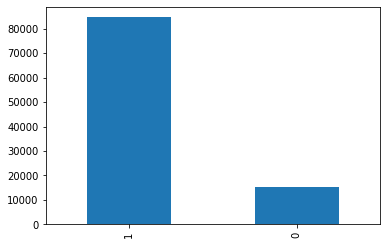

In [0]:
data1['sentiment'].value_counts().plot(kind='bar')

##Preprocessing and cleanning

In [0]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def remove_stop(sent): 
  stop_words = set(stopwords.words('english'))
  stop_words.update(list(string.punctuation))

  word_tokens = word_tokenize(sent) 
    
  filtered_sent = [w for w in word_tokens if not w in stop_words] 
    
  return " ".join(filtered_sent)

In [0]:
data1['review'] = data1['review'].apply(remove_stop)
data1

review  sentiment
483584  Everything went well order I received order to...          1
381660  This set arrived quickly nicely packaged gift ...          1
12209   I wish I read made China I bought They going t...          0
85594   I ordered thinking would wonderful character r...          0
257685  Yes use cutting bored I love one I grippy stuf...          1
...                                                   ...        ...
356508  licorice hard candies exactly see picture tast...          1
24129   Oh chips wonderful They greasy satisfying crun...          1
30216   I little disapointed product I allergic dairy ...          0
483062  My 2 year old kitty Misty absoluitely LOVES Fr...          1
250168  If love White tea ... BUY THIS Simply put ... ...          1

[100000 rows x 2 columns]

##bigrams (big data)

In [0]:
sent = [row.split() for row in data['review']]

In [0]:
phrases = Phrases(sent, min_count=30, progress_per=100000)

INFO - 05:54:26: collecting all words and their counts
INFO - 05:54:26: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 05:54:39: PROGRESS: at sentence #100000, processed 7872347 words and 1880051 word types
INFO - 05:54:52: PROGRESS: at sentence #200000, processed 15918804 words and 2956518 word types
INFO - 05:55:05: PROGRESS: at sentence #300000, processed 23858339 words and 3829199 word types
INFO - 05:55:18: PROGRESS: at sentence #400000, processed 31644024 words and 4509128 word types
INFO - 05:55:31: PROGRESS: at sentence #500000, processed 39443260 words and 5181296 word types


KeyboardInterrupt: ignored

In [0]:
bigram = Phraser(phrases)
sentences = bigram[sent]

##Train (big data)

In [0]:
# 2-building vocabulary
w2v_model.build_vocab(sentences, progress_per=100000)

In [0]:
# 3-trainning the model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=1, report_delay=1)

In [0]:
w2v_model.wv.most_similar(positive=["amazing"])

In [0]:
w2v_model.wv.most_similar(positive=["bad"])

In [0]:
w2v_model.wv.most_similar(positive=["good"])

In [0]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.bin', binary=True)  

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#calculating average word2vec
def get_avg_vec(words):
  # remove out-of-vocabulary words
  words = words.split(" ")
  words = [word for word in words if word in model]
  if len(words) >= 1:
      return np.mean(model[words], axis=0)
  else:
      return []

In [0]:
data1

review  sentiment
483584  Everything went well order I received order to...          1
381660  This set arrived quickly nicely packaged gift ...          1
12209   I wish I read made China I bought They going t...          0
85594   I ordered thinking would wonderful character r...          0
257685  Yes use cutting bored I love one I grippy stuf...          1
...                                                   ...        ...
356508  licorice hard candies exactly see picture tast...          1
24129   Oh chips wonderful They greasy satisfying crun...          1
30216   I little disapointed product I allergic dairy ...          0
483062  My 2 year old kitty Misty absoluitely LOVES Fr...          1
250168  If love White tea ... BUY THIS Simply put ... ...          1

[100000 rows x 2 columns]

In [0]:
data1['vector'] = data1['review'].apply(get_avg_vec)
data1 = data1[data1['vector'].map(len) == 300]

data1

review  ...                                             vector
483584  Everything went well order I received order to...  ...  [-0.03725157, 0.07513954, -0.012062204, 0.1851...
381660  This set arrived quickly nicely packaged gift ...  ...  [0.0014419556, 0.12189687, 0.039985146, 0.0741...
12209   I wish I read made China I bought They going t...  ...  [0.03130634, 0.10453209, 0.080566406, 0.117436...
85594   I ordered thinking would wonderful character r...  ...  [0.053767394, 0.049194336, 0.06464386, 0.08204...
257685  Yes use cutting bored I love one I grippy stuf...  ...  [0.0478007, 0.026329888, -0.029127333, 0.10898...
...                                                   ...  ...                                                ...
356508  licorice hard candies exactly see picture tast...  ...  [0.006285491, 0.020302102, -0.0028110081, 0.18...
24129   Oh chips wonderful They greasy satisfying crun...  ...  [-0.004683061, 0.007589167, 0.017544543, 0.184...
30216   I little disapointed product I allergic dairy ...  ...  [0.021486722, 0.014662523, 0.062561035, 0.1119...
483062  My 2 year old kitty Misty absoluitely LOVES Fr...  ...  [0.021681936, 0.05207343, -0.039102253, 0.1198...
250168  If love White tea ... BUY THIS Simply put ... ...  ...  [-0.037135534, 0.026013184, -0.002520534, 0.10...

[100000 rows x 3 columns]

#KNN

In [0]:
import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

ModuleNotFoundError: ignored

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train,y_train, myList):
   
    #creating odd list of K for KNN
    #myList = list(range(0,40))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(list(filter(lambda x: x % 2 != 0, myList)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_k

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, test_size=0.3)

train

review  ...                                             vector
429391  Unbelieveable flavor tastes like common bacon ...  ...  [-0.01960637, 0.06498366, 0.0104100155, 0.1601...
474459  I enjoyed full taste I get without bold burnt ...  ...  [0.061965942, 0.054653462, -0.029634915, 0.165...
16799   When I first took sip shock taste buds 100 fru...  ...  [-0.015718633, 0.011302602, 0.026127554, 0.124...
40371   2 12 oz bags slit open leaving beans amazon br...  ...  [-0.05839677, 0.041182086, -0.055836763, 0.102...
477687  I cant figure Gerber 2nd peas hard find store ...  ...  [0.025807543, 0.08178148, -0.016642408, 0.1221...
...                                                   ...  ...                                                ...
486441  delicious -- eat stuff spoonful goes great ANY...  ...  [0.020896912, 0.042541504, 0.02712977, 0.19930...
239521  These excellent They slightly bitter flavor go...  ...  [-0.11878313, 0.13320486, 0.0420881, 0.0994698...
231697  These worms great.. kids love them.. easy hand...  ...  [-0.035974123, 0.04345703, -0.051916502, 0.167...
183319  While younger self would swear thing would eve...  ...  [0.01739865, 0.03292432, 0.017263616, 0.137134...
204290  The pasta excellent It difficult find item I p...  ...  [-0.044025622, 0.08248901, 0.00039512233, 0.11...

[70000 rows x 3 columns]

In [0]:
Xtr1 = np.array(train['vector'].tolist())
ytr1 = np.array(train['sentiment'])

Xts1 = np.array(test['vector'].tolist())
yts1 = np.array(test['sentiment'])

In [0]:
myList = list(range(0,50))

optimal_k = find_optimal_k(Xtr1 ,ytr1,myList)

NameError: ignored

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)

NameError: ignored

In [0]:
knn.fit(Xtr1, ytr1)

NameError: ignored

In [0]:
pred = knn.predict(Xts1)

In [0]:
acc = np.mean(pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

recall = np.sum((pred == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((pred == 1)*(yts1 == 1))/np.sum(pred == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

#SVM

In [0]:
from sklearn import svm 

svcrbf = svm.SVC(probability=False, kernel="rbf",verbose=10) #C=2.8, gamma=.0073

In [0]:
svcrbf.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [0]:
yhat_ts = svcrbf.predict(Xts1)

In [0]:
acc = np.mean(yhat_ts == yts1)
print('Accuracy = {0:f}'.format(acc))

recall = np.sum((yhat_ts == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((yhat_ts == 1)*(yts1 == 1))/np.sum(yhat_ts == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy = 0.901367
Recall: 0.9764326957068228
Precision: 0.9133294143581453


#Logistic Regression

In [0]:
X = np.array(data1['vector'].tolist())
y = np.array(data1['sentiment'])

logreg = linear_model.LogisticRegression(penalty='none',solver='lbfgs')
logreg.fit(X, y)
yhat = logreg.predict(X)

acc = np.mean(yhat == y)
print("Accuracy: " + str(acc))

recall = np.sum((yhat == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhat == 1)*(y == 1))/np.sum(yhat == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy: 0.89527
Recall: 0.9686844382282171
Precision: 0.9125575059180848


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
data1.shape

(100000, 3)

In [0]:
all_one = np.full((100000), 1)

acc = np.mean(all_one == y)
print("Accuracy: " + str(acc))

recall = np.sum((yhat == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhat == 1)*(y == 1))/np.sum(yhat == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy: 0.84367
Recall: 0.9686844382282171
Precision: 0.9125575059180848


#Naive Bayes

In [0]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(Xtr1, ytr1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnb.predict(Xts1)

In [0]:
acc = np.mean(y_pred == yts1)
print('Accuracy = {0:f}'.format(acc))

recall = np.sum((y_pred == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((y_pred == 1)*(yts1 == 1))/np.sum(y_pred == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy = 0.762533
Recall: 0.7761498880553046
Precision: 0.9327354260089686
